In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

from src import anchor_matrix

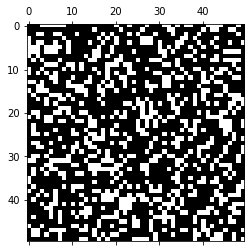

In [3]:
def genBenchmarkMatrix(n=50):
  rng = np.random.default_rng(0)
  M = rng.integers(low=0, high=(2+1), size=(n,n))
  return M > 0

M = genBenchmarkMatrix()
plt.spy(M);

In [4]:
importlib.reload(anchor_matrix);

In [5]:
c = anchor_matrix.biclique_find_all(M)
print(len(c))

2717885


10 at 8/2717885 (2.943465231236789e-06)


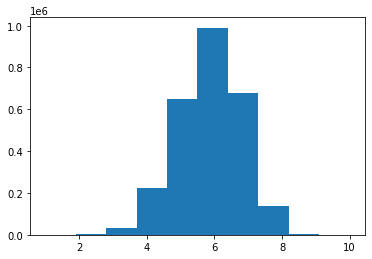

In [6]:
smallerSize = np.array([min(len(R), len(C)) for R, C in c])

plt.hist(smallerSize)
mx = np.max(smallerSize)
cnt = np.sum(smallerSize == mx)
print(f"{mx} at {cnt}/{len(smallerSize)} ({cnt/len(smallerSize)})")

In [7]:
all_cliques = list(anchor_matrix.biclique_find_all_networkx(M))
smallerSize = [min(len(R), len(C)) for R, C in all_cliques]
bestInd = np.argmax(smallerSize)
best_clique = all_cliques[bestInd]

In [295]:
c = anchor_matrix.biclique_find_all_networkx(M)
print(next(c))

(array([ 0,  2, 10, 40]), array([ 9, 14, 16, 28, 40, 46, 47, 49]))


In [302]:
clique = next(c)
print(clique)

(array([ 0,  2, 10, 13, 30, 40]), array([16, 28, 46, 47, 49]))


''

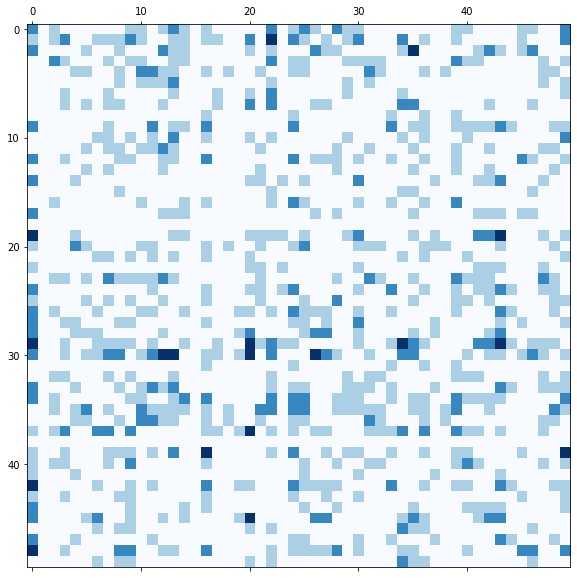

In [353]:
plt.figure(figsize=(10,10))
plt.spy(M, alpha=0.2)


MC = np.zeros_like(M, dtype=np.float64)
for _ in range(20):
  ind_row, ind_col = anchor_matrix.biclique_random(M)
  mask = np.zeros_like(M)
  mask[np.ix_(ind_row, ind_col)] = 1
  MC += mask
plt.imshow(MC, cmap="Blues", alpha=1)
mask = np.zeros_like(M)
mask[np.ix_(*best_clique)] = 1
#plt.spy(mask, alpha=0.5)
#plt.spy(MM, cmap="Blues", alpha=0.5)
#visClique(M, best_clique, cmap="Reds", alpha=0.5)
;


In [327]:
np.random.permutation(np.arange(100))

array([48, 23, 13, 14,  4, 63, 96, 12, 70, 37, 59,  1, 19, 10, 30, 66, 81,
       15, 57, 86, 77, 25, 91, 92, 26,  7, 18, 87, 16, 76, 73, 46, 31, 29,
       67, 42, 95, 27, 69, 11, 54, 49, 56, 98, 55, 89,  8,  0, 20, 94, 83,
       21, 39, 28, 40, 44, 60, 34, 53, 47, 71, 43, 32, 41, 52, 45, 72, 62,
        3, 90, 65, 17, 85,  5, 79, 38,  9, 99, 93, 97, 51, 58, 36, 35,  2,
        6, 22, 80, 75, 50, 88, 33, 84, 68, 78, 61, 82, 74, 24, 64])